In [47]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family="Malgun Gothic")

# 디렉토리 확인 및 데이터 로드 

In [2]:
%pwd

'C:\\Users\\김도연'

In [3]:
%ls 

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 949E-3DEA

 C:\Users\김도연 디렉터리

2021-02-14  오후 10:12         4,091,870  EDA of bookings and ML to predict cancelations.ipynb
2021-02-22  오후 07:29    <DIR>          .
2021-02-22  오후 07:29    <DIR>          ..
2019-11-08  오후 10:04    <DIR>          .android
2020-11-24  오후 10:39               260 .bash_history
2021-02-01  오후 07:54    <DIR>          .conda
2021-02-01  오후 07:47                43 .condarc
2021-02-22  오후 02:02    <DIR>          .ipynb_checkpoints
2020-11-10  오후 06:42    <DIR>          .ipython
2021-02-01  오후 04:39    <DIR>          .jupyter
2020-12-08  오후 01:27    <DIR>          .LdVirtualBox
2021-02-03  오후 06:24    <DIR>          .matplotlib
2021-02-13  오후 11:57         1,778,302 03-apt-price-eda-output.ipynb
2021-02-14  오전 01:43           121,691 04-coffee-store-choropleth.html
2021-02-14  오전 12:17            29,035 04-coffee-store-input.ipynb
2021-02-14  오전 01:44         4,569,648 04-coffee-store-output.ipynb
2021-02-18  오후 04:20         3,62

In [4]:
df = pd.read_csv("Card.csv")
df.shape

(24697792, 12)

# 데이터 메모리 최소화 작업

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      int64 
 1   CARD_SIDO_NM  object
 2   CARD_CCG_NM   object
 3   STD_CLSS_NM   object
 4   HOM_SIDO_NM   object
 5   HOM_CCG_NM    object
 6   AGE           object
 7   SEX_CTGO_CD   int64 
 8   FLC           int64 
 9   CSTMR_CNT     int64 
 10  AMT           int64 
 11  CNT           int64 
dtypes: int64(6), object(6)
memory usage: 2.2+ GB


In [6]:
df['SEX_CTGO_CD']=df['SEX_CTGO_CD'].astype('category')

In [7]:
df['CNT']=df['CNT'].astype('int32')

In [8]:
df['FLC']=df['FLC'].astype('category')

In [9]:
df['CSTMR_CNT']=df['CSTMR_CNT'].astype('int32')

In [10]:
df['REG_YYMM']=df['REG_YYMM'].astype('int32')

In [11]:
pd.options.display.float_format = '{:.2f}'.format

In [12]:
df.describe()

,REG_YYMM,CSTMR_CNT,AMT,CNT
count,24697792.00,24697792.00,24697792.00,24697792.00
mean,201923.06,61.97,2441352.94,126.04
std,36.20,355.92,17260959.04,966.94
min,201901.00,3.00,20.00,1.00
25%,201904.00,4.00,90200.00,5.00
50%,201908.00,8.00,252680.00,12.00
75%,201911.00,24.00,843337.25,40.00
max,202003.00,32813.00,2349523701.00,120357.00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column        Dtype   
---  ------        -----   
 0   REG_YYMM      int32   
 1   CARD_SIDO_NM  object  
 2   CARD_CCG_NM   object  
 3   STD_CLSS_NM   object  
 4   HOM_SIDO_NM   object  
 5   HOM_CCG_NM    object  
 6   AGE           object  
 7   SEX_CTGO_CD   category
 8   FLC           category
 9   CSTMR_CNT     int32   
 10  AMT           int64   
 11  CNT           int32   
dtypes: category(2), int32(3), int64(1), object(6)
memory usage: 1.6+ GB


# 결측치 처리 

In [13]:
df.isnull().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

<AxesSubplot:>

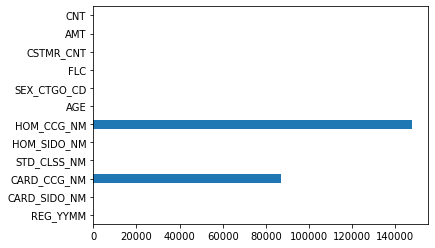

In [14]:
df.isnull().sum().plot.barh()

In [15]:
df[df['HOM_CCG_NM'].isnull()]['HOM_SIDO_NM'].value_counts()

세종    147787
Name: HOM_SIDO_NM, dtype: int64

In [16]:
df['HOM_CCG_NM']=df['HOM_CCG_NM'].fillna('세종시')

In [17]:
df.isnull().sum()

REG_YYMM            0
CARD_SIDO_NM        0
CARD_CCG_NM     87213
STD_CLSS_NM         0
HOM_SIDO_NM         0
HOM_CCG_NM          0
AGE                 0
SEX_CTGO_CD         0
FLC                 0
CSTMR_CNT           0
AMT                 0
CNT                 0
dtype: int64

In [18]:
df[df['CARD_CCG_NM'].isnull()]['CARD_SIDO_NM'].value_counts()

세종    87213
Name: CARD_SIDO_NM, dtype: int64

In [19]:
df['CARD_CCG_NM']=df['CARD_CCG_NM'].fillna('세종시')

In [20]:
df.isnull().sum()

REG_YYMM        0
CARD_SIDO_NM    0
CARD_CCG_NM     0
STD_CLSS_NM     0
HOM_SIDO_NM     0
HOM_CCG_NM      0
AGE             0
SEX_CTGO_CD     0
FLC             0
CSTMR_CNT       0
AMT             0
CNT             0
dtype: int64

# 이상치 확인

In [21]:
df.describe()

,REG_YYMM,CSTMR_CNT,AMT,CNT
count,24697792.00,24697792.00,24697792.00,24697792.00
mean,201923.06,61.97,2441352.94,126.04
std,36.20,355.92,17260959.04,966.94
min,201901.00,3.00,20.00,1.00
25%,201904.00,4.00,90200.00,5.00
50%,201908.00,8.00,252680.00,12.00
75%,201911.00,24.00,843337.25,40.00
max,202003.00,32813.00,2349523701.00,120357.00


In [23]:
df.head(1)

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4


# EDA

<AxesSubplot:xlabel='CARD_SIDO_NM'>

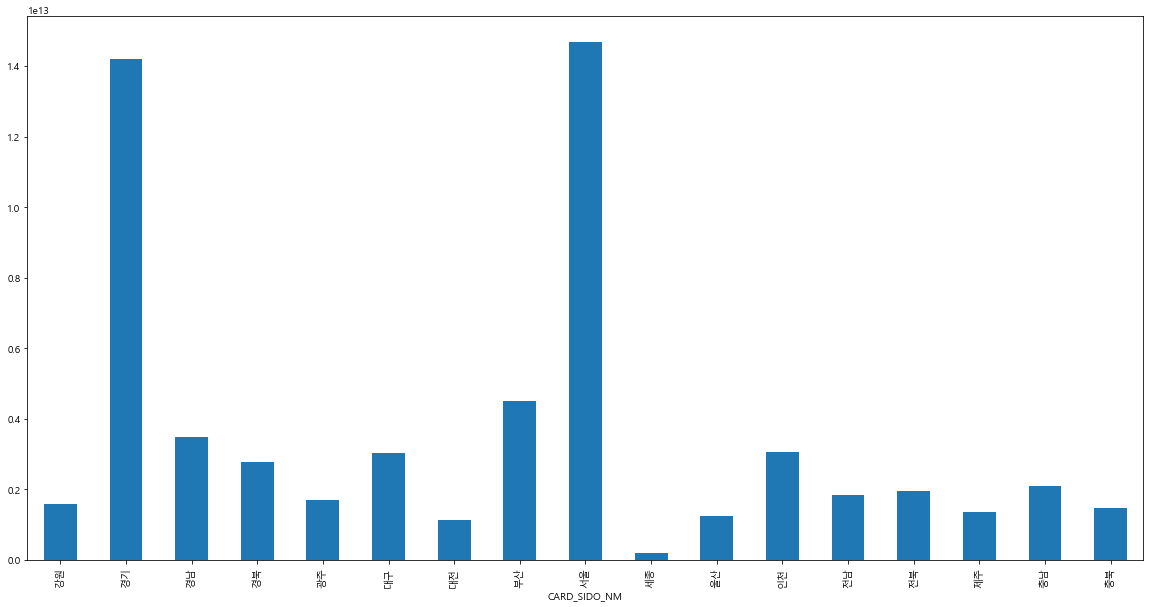

In [50]:
df.groupby('CARD_SIDO_NM')['AMT'].sum().plot.bar(figsize=(20,10))

In [51]:
sns.countplot(x='CARD_SIDO_NM',y='AMT',data=df)

ValueError: Cannot pass values for both `x` and `y`